In [1]:
from cmbfisher import CMBFisher, Planck2015pars, Planck2015expt
import numpy as np

pars = Planck2015pars
pars

{'H0': 67.8,
 'Obh2': 0.02226,
 'Och2': 0.1186,
 'tau': 0.066,
 'ln10As': 3.062,
 'ns': 0.9677,
 'mnu': 0.06,
 'Neff': 3.046,
 'r': 0.0,
 'omk': 0.0}

In [2]:
# The default experimental and parameter values are for Planck 2015
# These can be changed using through the expt (takes CMBExperiment) and
# cosmology (takes a dictionary of parameters, see Planck2015pars in cmbfisher.py)

# Example for 6 LCDM parameters

fisher_params = ["ln10As", "ns", "tau", "H0", "Och2", "Obh2"]
fisher_values = [pars[nam] for nam in fisher_params]
labels =  [r'$\ln(10^{10}A_s)$', '$n_s$', r'$\tau$', '$H_0$', '$O_c h^2$', '$O_b h^2$']

cmb_fisher = CMBFisher(params = fisher_params[0:6],
                       param_values = fisher_values[0:6],
                       param_names = labels[0:6])

In [3]:
# Using only TT data
cmb_fisher.include_polarization = False
cmb_fisher.Cl_covmat_computed = False # make sure the covariance matrix is recomputed
fm = cmb_fisher.fisher();
cmb_fisher.covariance();

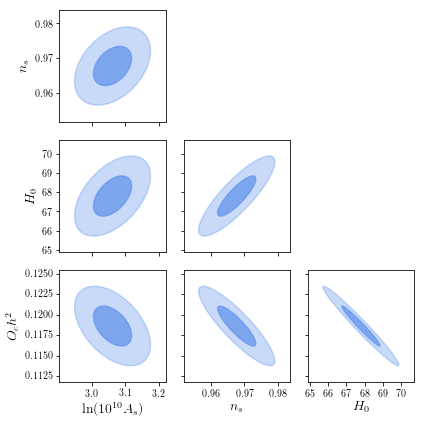

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

cmb_fisher.plot_error_matrix([0,1,3,4])

In [5]:
# now with polarization (EE, TE) spectra too

cmb_fisher.include_polarization = True
cmb_fisher.Cl_covmat_computed = False # recompute for polarization
fmwp = cmb_fisher.fisher()
cmb_fisher.covariance();

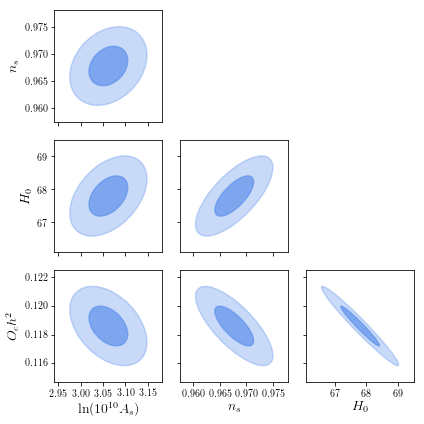

In [6]:
cmb_fisher.plot_error_matrix([0,1,3,4])